In [1]:
import matplotlib.pyplot as plt #melakukan import library matplotlib.pyplot sebagai plt
import numpy as np #melakukan import library numpy sebagai np
import cv2 as cv #melakukan import library cv2 sebagai cv

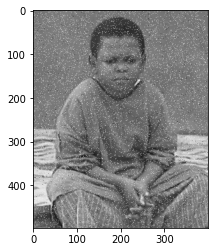

In [2]:
img = plt.imread("iwannabe.jpeg") #memgimport citra iwannabe.jpeg dengan fungsi imread pada library plt dan memasukkannya ke variabel img
plt.imshow(img, cmap='gray') #menampilkan citra pada img

Median Filtering

In [3]:
#membuat fungsi untuk melakukan operasi terhadap matriks citra untuk mencari median
def medianFunc(img):
    #mengambil nilai tinggi dan lebar dari ukuran citra dan memasukkannya pada variabel row dan col
    row, col = img.shape
    n = row*col #variabel n menyimpan hasil dari perkalian tinggi dan lebar citra pada variabel row dan col
    arr = np.sort(img, axis=None) #variabel arr menyimpan matriks dari citra img yang telah di urutkan menggunakan fungsi sort
    #mengecek apa bila nilai dari n habis dibagi 2(bernilai genap)
    if n%2 == 0:
        #jika iya maka variabel a akan menampung nilai tengah dari citra
        a = arr[n//2]
        #dan b akan menapung nilai tengah di kurangi 1
        b = arr[n//2-1]
        #c akan melakukan operasi yang akan menghasilkan nilai tengah dari citra dengan rumus (a+b)/2
        c = (a+b)/2
    else:
        #jika tidak bisa di bagi dua maka, c langsung menampung nilai tengah dari matriks citra
        c = arr[n//2]
    #dan fungsi akan mereturn nilai c sebagai hasil
    return c

In [4]:
#membuat fungsi yang akan mencetak citra yang telah dilakukannya median filtering
def resultMed(img, bar, kol):
    result = np.zeros(img.shape) #membuat matriks nol dengan ukuran sesuai dengan citra pada parameter dan memasukkannya ke variabel result
    row, col = int((bar-1)/2), int((kol-1)/2) #
    #melakukan padding pada citra dengan fungsi pad pada numpy dan ditampung oleh variabel padding
    padding = np.pad(img, ((row, bar-(row-1)), (col, kol-(col-1))), "constant")
    #melakukan perulangan i sebanyak ukuran dari citra
    for i in range (len(img)):
        #melakukan perulangan j didalam perulangan i sebanyak ukuran citra pada indeks ke i
        for j in range (len(img[i])):
            #perulangan dilakukan untuk dilakukannya operasi pada setiap elemen matriks pada citra yang telah dipadding
            #citra yang telah dipadding dilakukan operasi pada indeks [i:i+bar, j:j+kol] dilakukan operasi pencarian median dengan fungsi medianFunc
            #dan memasukkan hasilnya ke variabel result[i,j]
            result[i,j] = medianFunc(padding[i:i+bar, j:j+kol])
    #mengembalikan variabel result sebagai hasil dari fungsi
    return result

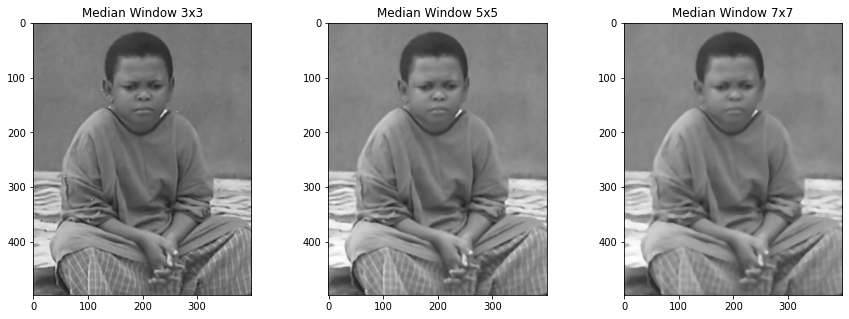

In [5]:
#mengatur ukuran dari citra yang ditampilkan
plt.figure(figsize=(15,5)) 
#membuat plot 1 baris, 3 kolom, dan penempatan pada kolom 1
plt.subplot(1,3,1) 
#mencetak hasil citra yang telah dilakukan median fitering
plt.imshow(resultMed(img, 3, 3), cmap='gray')
#membuat judul untuk citra yang telah ditampilkan
plt.title("Median Window 3x3")
plt.subplot(1,3,2) 
plt.imshow(resultMed(img, 5, 5), cmap='gray')
plt.title("Median Window 5x5")
plt.subplot(1,3,3) 
plt.imshow(resultMed(img, 7, 7), cmap='gray')
plt.title("Median Window 7x7")
#menampilkan semua citra yang telah dilakukan median filtering
plt.show()

Mean Filtering

In [6]:
#membuat fungsi untuk melakukan operasi mean pada citra 
def meanFunc(img):
    #melakukan penjumlahan pada seluruh elemen matriks citra
    summ = np.sum(img)
    row, col = img.shape #mengambil nilai tinggi dan lebar citra dengan fungsi shape dan memasukkan nilainya ke variabel row dan col
    #mengembalikan nilai hasil dari summ/(row*col) ke fungsi
    return(summ/(row*col))

In [7]:
#membuaut fungsi untuk menampilkan hasil dari citra yang telah dilakukan mean filtering
def resultMean(img, bar, kol):
    #membuat matriks kosong sesuai dengan ukuran citra pada parameter dan memasukkan matriks kosong itu ke variabel result
    result = np.zeros(img.shape)
    row, col = int((bar-1)/2), int((kol-1)/2) #variabel row dan col akan menampung hasil dari int((bar-1)/2) dan int((kol-1)/2)
    padding = np.pad(img, ((row, bar-(row-1)), (col, kol-(col-1))), "constant") #melakukan padding pada citra dengan fungsi pad pada numpy dan ditampung oleh variabel padding

    #melakukan perulangan sebanyak ukuran cari citra untuk menelusuri elemen2 matriks citra
    for i in range(len(img)):
        for j in range(len(img[i])):
            #perulangan dilakukan untuk dilakukannya operasi pada setiap elemen matriks pada citra yang telah dipadding
            #citra yang telah dipadding dilakukan operasi pada indeks [i:i+bar, j:j+kol] dilakukan operasi pencarian mean dengan fungsi meanFunc
            #dan memasukkan hasilnya ke variabel result[i,j]
            result[i,j] = meanFunc(padding[i:i+bar, j:j+kol])
    return result #mengembalikan variabel result sebagai hasil dari fungsi
    

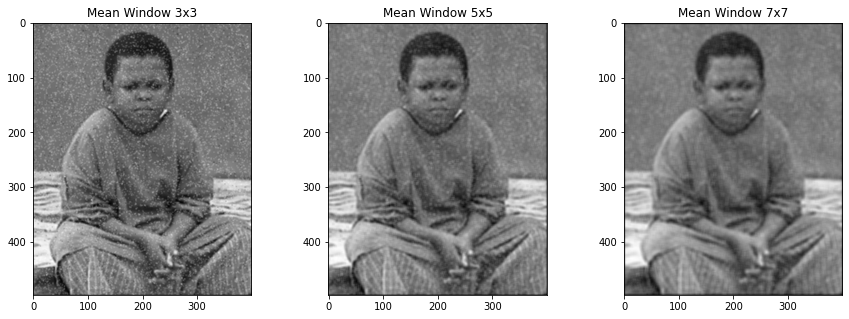

In [8]:
#mengatur ukuran dari citra yang ditampilkan
plt.figure(figsize=(15,5)) 
#membuat plot 1 baris, 3 kolom, dan penempatan pada kolom 1
plt.subplot(1,3,1) 
#mencetak hasil citra yang telah dilakukan mean fitering
plt.imshow(resultMean(img, 3, 3), cmap='gray')
#membuat judul untuk citra yang telah ditampilkan
plt.title("Mean Window 3x3")
plt.subplot(1,3,2) 
plt.imshow(resultMean(img, 5, 5), cmap='gray')
plt.title("Mean Window 5x5")
plt.subplot(1,3,3) 
plt.imshow(resultMean(img, 7, 7), cmap='gray')
plt.title("Mean Window 7x7")
#menampilkan semua citra yang telah dilakukan mean filtering
plt.show()

Modus Filtering

In [24]:
#membuat fungsi untuk melakukan operasi modus pada matriks citra
def modusFunc(img):
    #variabel mrx menampung matriks citra yang telah diurutkan
    mrx = np.sort (img, axis=None)
    idx = np.zeros(np.max(mrx)+1, dtype = int) #variabel idx membuat matriks nol dengan ukuran dari nilai tertinggi citra ditambah 1
    #melakukan perulangan sebanyak ukuran dari citra yang telah diururtkan
    #dan setiap elemen indeks pada idx berdasarkan indeks pada mrx di tambahkan 1
    for i in range (len(mrx)):
        idx[mrx[i]] += 1

    #variabel maks akan mengambil nilai tertinggi pada matriks idx    
    maks = np.max(idx)
    #perulangan sebanyak ukuran dari idx
    #dan mengecek apabila elemen idx ke j sama dengan maks maka fungsi akan mengembalikan nilai j ke fungsi
    for j in range (len(idx)):
        if (idx[j] == maks):
            return j

In [25]:
#membuat fungsi untuk menampilkan citra yang telah dilakukan modus filtering
def resultModus(img, bar, kol): 
    #result variabel yang akan menampung matriks nol dengan ukuran dari citra
    result = np.zeros(img.shape)
    #variabel row dan col akan menampung hasil dari int((bar-1)/2), int((kol-1)/2)
    row, col = int((bar-1)/2), int((kol-1)/2)
    #melakukan padding pada citra dengan fungsi pad pada numpy dan ditampung oleh variabel padding
    padding = np.pad(img, ((row,bar-(row-1)),(col,kol-(col-1))), "constant")
    #melakukan perulangan sebanyak ukuran cari citra untuk menelusuri elemen2 matriks citra
    for i in range(len(img)):
        for j in range(len(img[i])):
            #perulangan dilakukan untuk dilakukannya operasi pada setiap elemen matriks pada citra yang telah dipadding
            #citra yang telah dipadding dilakukan operasi pada indeks [i:i+bar, j:j+kol] dilakukan operasi pencarian modus dengan fungsi modusFunc
            #dan memasukkan hasilnya ke variabel result[i,j]
            result[i,j] = modusFunc(padding[i:i+bar, j:j+kol])
    #mengembalikan variabel result sebagai hasil dari fungsi        
    return result

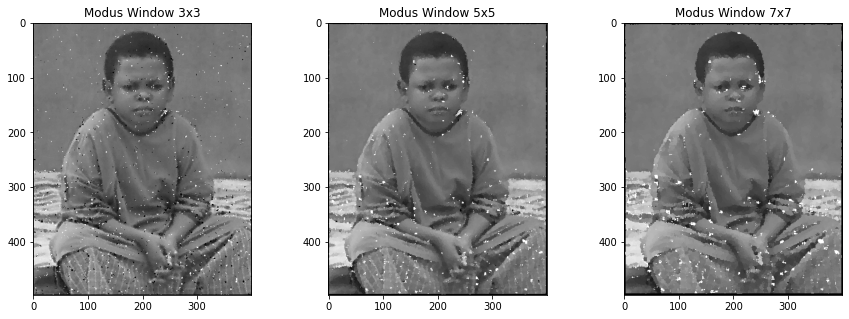

In [26]:
plt.figure(figsize=(15,5)) #mengatur ukuran dari citra yang ditampilkan
#membuat plot 1 baris, 3 kolom, dan penempatan pada kolom 1
plt.subplot(1,3,1) 
#mencetak hasil citra yang telah dilakukan mean fitering
plt.imshow(resultModus(img, 3, 3), cmap='gray')
#membuat judul untuk citra yang telah ditampilkan
plt.title("Modus Window 3x3")
plt.subplot(1,3,2) 
plt.imshow(resultModus(img, 5, 5), cmap='gray')
plt.title("Modus Window 5x5")
plt.subplot(1,3,3) 
plt.imshow(resultModus(img, 7, 7), cmap='gray')
plt.title("Modus Window 7x7")
#menampilkan semua citra yang telah dilakukan mean filtering
plt.show()